In [1]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
import geopandas as gpd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
data = gpd.read_file("C2017-2012_RM_pob_socioec.gpkg")
data

,densidad,pct_adultoMayor,pct_inmigrante,pct_originario,pct_nna,pct_hombres,pct_mujeres,pct_adultos,EDUC,Hacinpunt,NSE,geometry
0,0.054692,4.581152,35.994764,9.293194,19.633508,47.513089,52.486911,75.785340,12.296209,120,615.703002,"POLYGON ((344096.410 6300127.298, 344107.550 6..."
1,0.048181,7.957154,15.455241,6.350421,20.887529,46.595256,53.404744,71.155318,12.212580,120,565.386146,"POLYGON ((344409.506 6299902.537, 344265.614 6..."
2,0.010379,6.250000,29.687500,0.000000,21.875000,50.000000,50.000000,71.875000,10.868421,120,538.684211,"POLYGON ((343989.345 6300001.313, 343988.286 6..."
3,0.003985,0.000000,46.153846,11.538462,11.538462,48.076923,51.923077,69.230769,11.500000,120,533.823529,"POLYGON ((343776.213 6299893.815, 343773.421 6..."
4,0.008718,13.432836,37.313433,0.000000,0.000000,52.238806,47.761194,73.134328,9.692308,120,459.769231,"POLYGON ((343998.500 6299870.782, 343948.879 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
39896,0.010371,20.261438,7.189542,9.150327,11.111111,51.633987,48.366013,68.627451,9.700000,200,575.708333,"MULTIPOLYGON (((345130.403 6292602.454, 345133..."
39897,0.016502,20.652174,0.000000,13.043478,0.000000,58.695652,41.304348,68.478261,8.826531,120,431.309524,"POLYGON ((343516.840 6292797.778, 343464.863 6..."
39898,0.019252,7.142857,35.714286,16.326531,13.265306,53.061224,46.938776,79.591837,0.000000,0,0.000000,"MULTIPOLYGON (((343621.691 6292917.766, 343571..."
39899,0.046861,10.389610,0.000000,0.000000,32.467532,50.649351,49.350649,57.142857,7.914634,120,399.996791,"POLYGON ((343209.239 6292809.688, 343215.843 6..."


Text(0.5, 1.0, 'Distribucion de población en Santiago según CENSO 2012-2018')

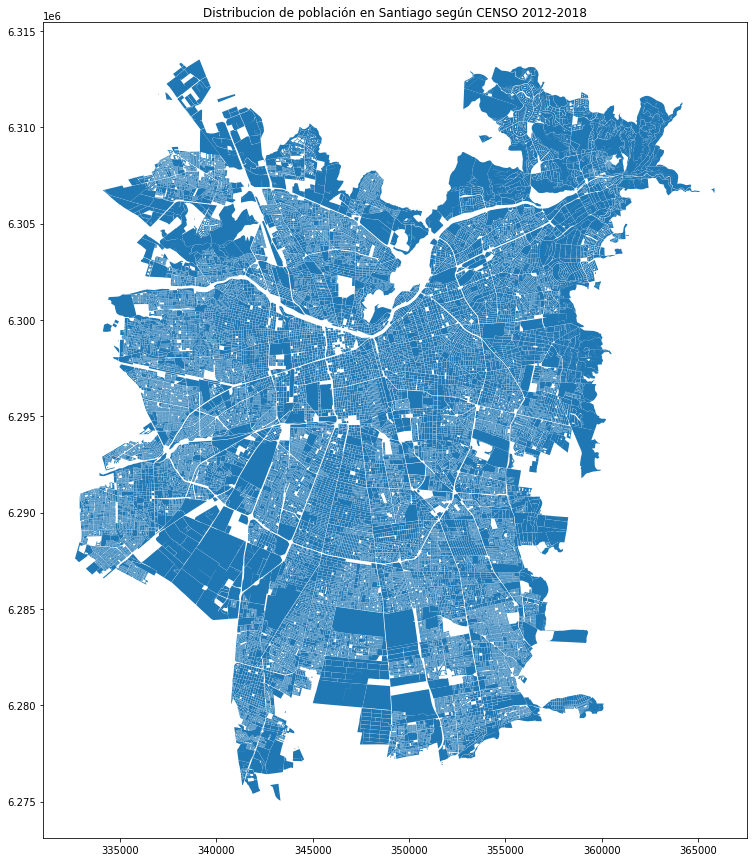

In [3]:
fig, ax = plt.subplots(figsize = (20, 15))
data.plot(ax = ax)
ax.set_title("Distribucion de población en Santiago según CENSO 2012-2018")

In [4]:
geometry = data["geometry"]

In [5]:
data.drop("geometry", axis = 1, inplace=True)

In [6]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(data)
data_sc

array([[ 2.62755543, -0.85066647,  3.4884121 , ...,  0.92240589,
        -0.19439716,  0.77193235],
       [ 2.13041708, -0.45537733,  1.20574721, ...,  0.88918019,
        -0.19439716,  0.41565012],
       [-0.75603497, -0.65526446,  2.78745275, ...,  0.35514714,
        -0.19439716,  0.22657977],
       ...,
       [-0.07849973, -0.55072165,  3.45724103, ..., -3.96286723,
        -3.62881875, -3.58772092],
       [ 2.02956951, -0.17056597, -0.51187473, ..., -0.81838986,
        -0.19439716, -0.75543439],
       [-0.72039556, -0.41133123, -0.51187473, ..., -0.30353302,
        -0.19439716, -0.66410696]])

In [7]:
inertia=[]
kmax=12
for i in range(1,kmax):

    kmeans = KMeans(n_clusters=i,n_init=10)
    kncl= kmeans.fit(data_sc)

    print(i,kncl.inertia_)
    inertia.append(kncl.inertia_)

1 438911.0000000001
2 367271.580203454
3 327679.3708510725
4 299239.83788134344
5 276222.00580656884
6 258000.39020321265
7 238541.56219175842
8 225957.525957985
9 215326.44975525758
10 205055.44931515312
11 197396.7075989405


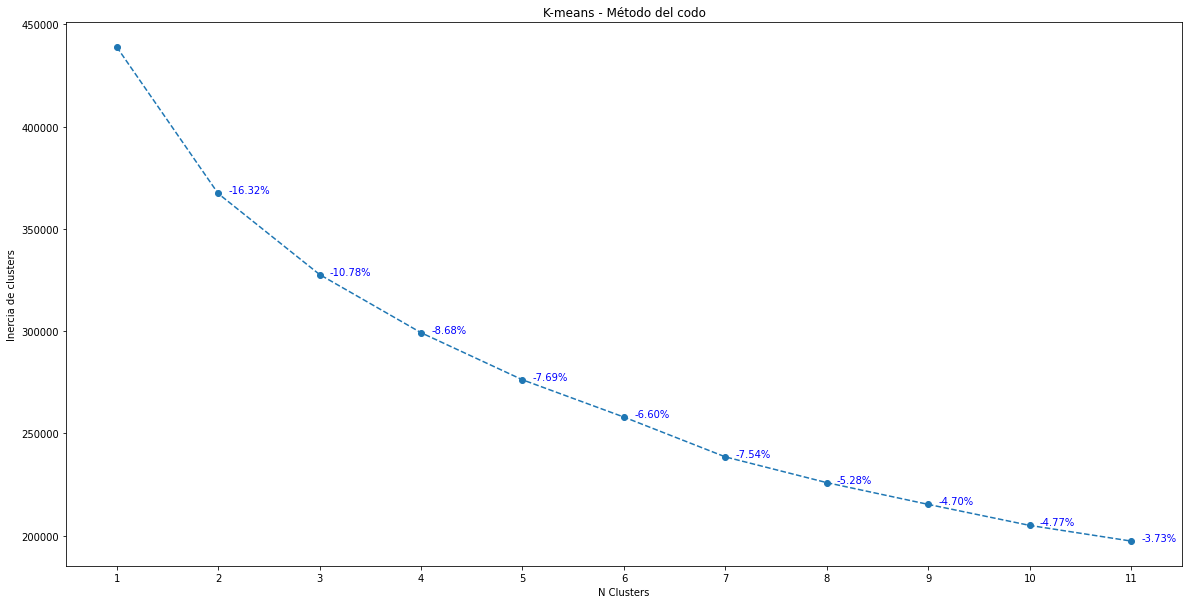

In [8]:
f, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1,kmax),inertia,marker='o',ls='--')
ax.set_xlabel('N Clusters')
ax.set_ylabel('Inercia de clusters')
ax.set_title('K-means - Método del codo')

for i in range(1,len(inertia)):
    delta=(-inertia[i-1]+inertia[i])/inertia[i-1]*100
    ax.text(i+1.1,inertia[i],'%.2f'%delta+'%',color='b')
ax.set_xticks(range(1,kmax))

plt.show()

In [9]:
k=5

# Inicializamos la instancia  KMeans 
kmeans = KMeans(n_clusters=k,random_state=0)


# Correr el algoritmo sobre el conjunto de variable normalizadas
kcls = kmeans.fit(data_sc)


In [10]:
data['kcls_labels'] = kcls.labels_

In [11]:
centers = kcls.cluster_centers_
centers_i = scaler.inverse_transform(centers)

centers_i

array([[2.47980548e-02, 8.13923400e+00, 3.36976087e+01, 8.44597613e+00,
        1.26331725e+01, 5.17736317e+01, 4.80205011e+01, 7.48466238e+01,
        1.07414002e+01, 1.22038085e+02, 5.19866272e+02],
       [1.21837493e-02, 1.56362092e+01, 5.79985594e+00, 4.26196833e+00,
        1.04596386e+01, 4.60767073e+01, 5.34525198e+01, 6.59858004e+01,
        1.31735032e+01, 1.99576304e+02, 7.35133886e+02],
       [2.70965741e-02, 8.84284742e+00, 2.59656171e+00, 1.40403079e+01,
        1.97750545e+01, 4.93164724e+01, 5.06319102e+01, 6.89888812e+01,
        8.93262355e+00, 1.19341592e+02, 4.45714973e+02],
       [1.48066352e-02, 1.50150566e+01, 2.52907426e+00, 7.01670890e+00,
        9.36311468e+00, 4.74344904e+01, 5.23775135e+01, 6.79808604e+01,
        1.07359058e+01, 1.19995822e+02, 5.35209896e+02],
       [1.30038388e-02, 6.89540659e+00, 6.72370690e+00, 7.30792396e+00,
        1.16558771e+01, 4.59804289e+01, 4.57333187e+01, 6.34613901e+01,
        2.43470646e-02, 3.38983051e-01, 1.17815073e+

In [12]:
data["geometry"] = geometry

C:\Users\snmar\AppData\Local\Temp\ipykernel_17212\1681604517.py:1: FutureWarning: Setting geometries to a GeoDataFrame without a geometry column will currently preserve the CRS, if present. This is deprecated, and in the future the CRS will be lost in this case. You can use set_crs(..) on the result to set the CRS manually.
  data["geometry"] = geometry


<AxesSubplot:>

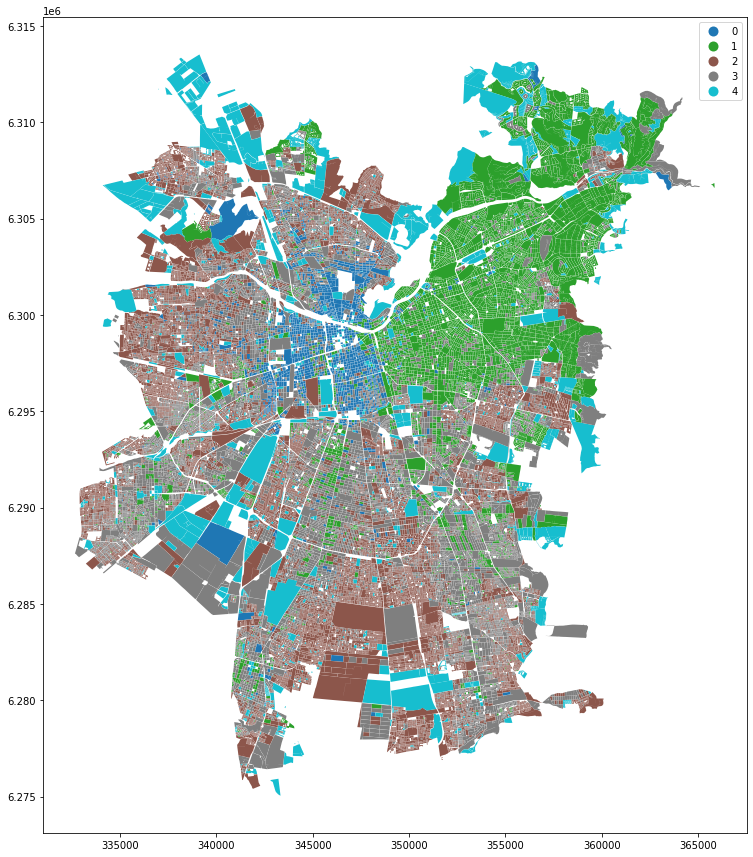

In [13]:
data.plot(figsize=(20,15),column = "kcls_labels", categorical = True, legend = True)


In [14]:
values = data.groupby(by = "kcls_labels").mean().sort_values(by="NSE")
data.groupby(by = "kcls_labels").mean().sort_values(by="NSE")

,densidad,pct_adultoMayor,pct_inmigrante,pct_originario,pct_nna,pct_hombres,pct_mujeres,pct_adultos,EDUC,Hacinpunt,NSE
kcls_labels,,,,,,,,,,,
4,0.013004,6.895407,6.723707,7.307924,11.655877,45.980429,45.733319,63.461390,0.024347,0.338983,1.178151
2,0.027116,8.853538,2.595868,14.061052,19.782820,49.318737,50.629518,68.973571,8.928894,119.339964,445.512391
0,0.024806,8.138857,33.704164,8.450325,12.633033,51.777037,48.016990,74.844884,10.741884,122.039135,519.862657
3,0.014819,14.982260,2.531217,7.011654,9.385106,47.436700,52.375891,68.003759,10.735249,119.995835,535.201962
1,0.012185,15.639277,5.800994,4.262805,10.459729,46.077900,53.451235,65.983443,13.173167,199.591917,735.130184


In [15]:
colegios = pd.read_csv("Directorio_Oficial_EE_2021.csv", sep=";")
colegios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16498 entries, 0 to 16497
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGNO            16498 non-null  int64 
 1   RBD             16498 non-null  int64 
 2   DGV_RBD         16498 non-null  int64 
 3   NOM_RBD         16468 non-null  object
 4   MRUN            16498 non-null  object
 5   RUT_SOSTENEDOR  16498 non-null  object
 6   P_JURIDICA      16498 non-null  int64 
 7   COD_REG_RBD     16498 non-null  int64 
 8   NOM_REG_RBD_A   16498 non-null  object
 9   COD_PRO_RBD     16498 non-null  int64 
 10  COD_COM_RBD     16498 non-null  int64 
 11  NOM_COM_RBD     16498 non-null  object
 12  COD_DEPROV_RBD  16498 non-null  int64 
 13  NOM_DEPROV_RBD  16498 non-null  object
 14  COD_DEPE        16498 non-null  int64 
 15  COD_DEPE2       16498 non-null  int64 
 16  RURAL_RBD       16498 non-null  int64 
 17  LATITUD         16498 non-null  object
 18  LONGIT

In [16]:
colegios["NOM_DEPROV_RBD"]

0                   ARICA
1                   ARICA
2                   ARICA
3                   ARICA
4                   ARICA
               ...       
16493    SANTIAGO ORIENTE
16494               ELQUI
16495          CONCEPCIÓN
16496    SANTIAGO ORIENTE
16497          VALPARAÍSO
Name: NOM_DEPROV_RBD, Length: 16498, dtype: object

In [17]:
colegios = colegios[colegios["NOM_DEPROV_RBD"].str.contains("SANTIAGO+", regex=True)]
colegios = colegios[colegios["NOM_RBD"].str.contains("JARDIN+|SALA CUNA+", regex=True) != True]

In [18]:
colegios

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ENS_08,ENS_09,ENS_10,ENS_11,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL
1330,2021,1646,2,COLEGIO CRISTIANO SAN LUCAS,,,9,13,RM,131,...,0,0,0,0,0,3,9,,SIN INFORMACION,SIN INFORMACION
5649,2021,6880,2,COLEGIO ANGLO AMERICAN INTERNATIONAL,,,9,13,RM,131,...,0,0,0,0,0,3,9,,SIN INFORMACION,SIN INFORMACION
6994,2021,8485,9,LICEO INSTITUTO NACIONAL,,69070100,1,13,RM,131,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
6996,2021,8487,5,LICEO JAVIERA CARRERA,,69070100,1,13,RM,131,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
6997,2021,8488,3,LICEO N° 4 BICENTENARIO ISAURA DINATOR,,69070100,1,13,RM,131,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16433,2021,41822,6,ESCUELA ESPECIAL DE LENGUAJE LOS TIGRITOS,,65190699,1,13,RM,131,...,0,0,0,0,0,1,9,,SIN INFORMACION,SIN INFORMACION
16434,2021,41823,4,ESCUELA ESPECIAL DE LENGUAJE EL GATO Y LA LUNA,,65195132,1,13,RM,131,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
16441,2021,41831,5,MY LEARNING,,77076018,1,13,RM,131,...,0,0,0,0,0,1,9,,SIN INFORMACION,SIN INFORMACION
16446,2021,41839,0,CENTRO VITAMINA ÑUBLE,,76407810,1,13,RM,131,...,0,0,0,0,0,1,9,,SIN INFORMACION,SIN INFORMACION


In [19]:
colegios["LONGITUD"] = colegios["LONGITUD"].replace(" ", np.nan)
colegios["LATITUD"] = colegios["LATITUD"].replace(" ", np.nan)
colegios.dropna()
colegios["LONGITUD"] = colegios["LONGITUD"].str.replace(",",".").astype(np.float64)
colegios["LATITUD"] = colegios["LATITUD"].str.replace(",",".").astype(np.float64)
colegios = colegios[colegios["LONGITUD"] <= -50]


In [47]:
localizaciones = gpd.GeoDataFrame(colegios, geometry= gpd.points_from_xy(colegios["LONGITUD"], colegios["LATITUD"]), crs = 4326)

In [55]:
codigos = [13101, 13102, 13103, 13104, 13105, 13106, 13107, 13108, 13109, 13110, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118, 13119, 13120, 13121, 13122, 13123, 13124, 13125, 13126, 13127, 13128, 13129, 13130, 13131, 13132]
localizaciones = localizaciones[localizaciones["COD_COM_RBD"].isin(codigos) == True]

In [56]:
data = data.to_crs(4326)

<AxesSubplot:>

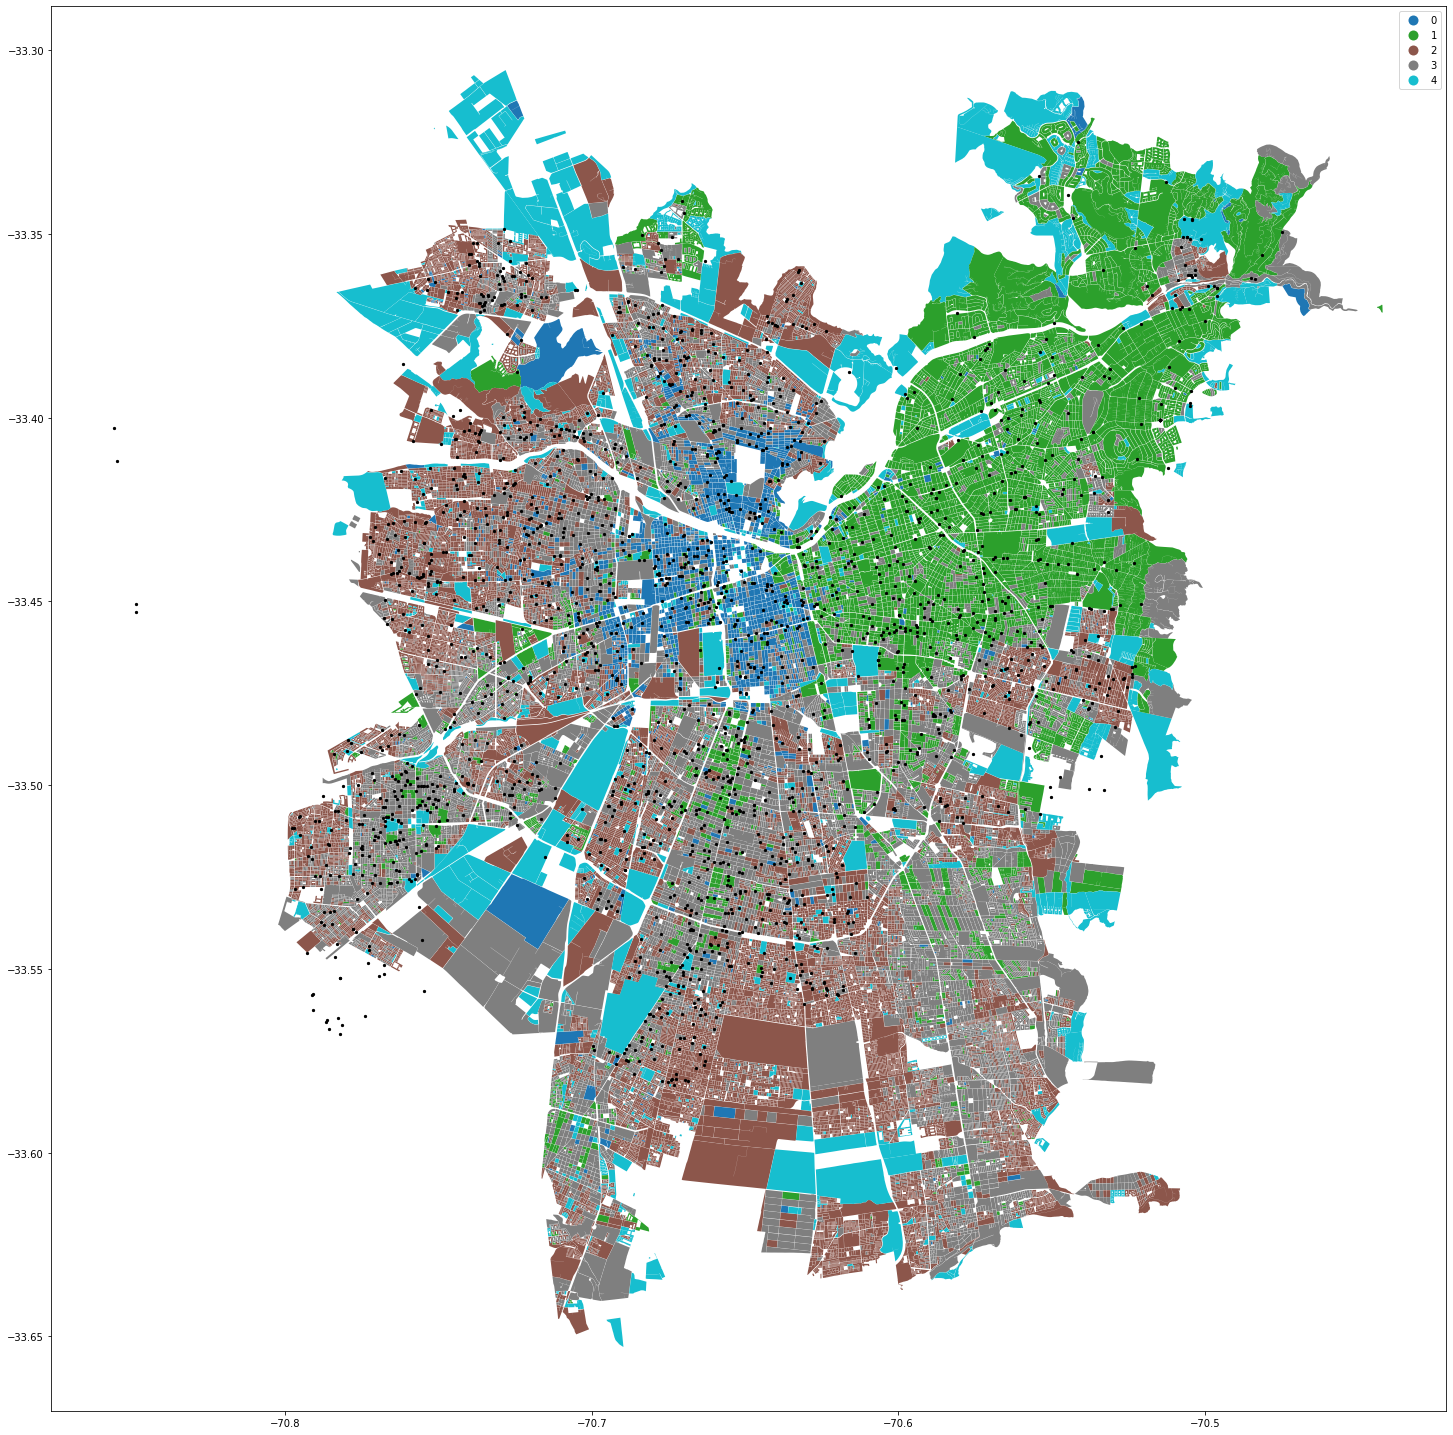

In [61]:
plot_mapa = data.plot(figsize=(25,30),column = "kcls_labels", categorical = True, legend = True)
localizaciones.plot(ax = plot_mapa, markersize=5, color="black")